In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import fetch_california_housing

from lasso import *

import matplotlib.pyplot as plt
plt.style.use('dark_background')

In [2]:
params = {
    'font.size': 14,
    'figure.figsize': (11,7),
}
plt.rcParams.update(params)

In [3]:
scaler = StandardScaler()
housing = fetch_california_housing()
housing_data = scaler.fit_transform(housing.data)
housing_target = housing.target
m, n = housing.data.shape
housing_data_plus_bias = np.c_[np.ones((m, 1)), housing_data]

In [4]:
m, n

(20640, 8)

In [5]:
n_epochs = int(1e3)
learning_rate = 0.01
l1_strength = 0.1

## LASSO regression

In [6]:
model = Lasso()
model.X = housing_data_plus_bias
## VERY IMPORTANT : reshape y, 
## otherwise tf will do some messy inline reshaping, slowing down 50x
model.y = housing_target.reshape(-1,1)
model.n_epochs = n_epochs
model.verbose = False
model.optim_params = {
    'optimizer_name': 'adam',
    'learning_rate': learning_rate,
}

In [7]:
model.fit()


For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.



In [8]:
theta_hat = model.theta

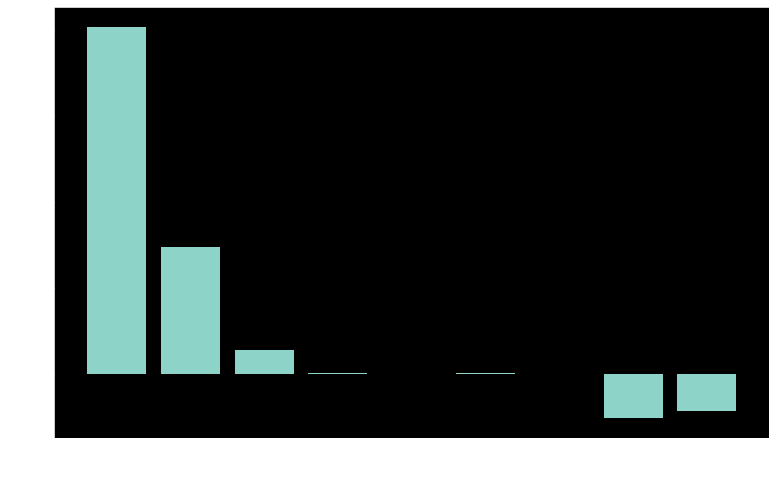

In [9]:
fig, ax = plt.subplots(nrows=1, ncols=1)
index = range(n+1)
ax.bar(index, theta_hat.flatten())
ax.set_xlabel(r'Component of $\theta$')
ax.set_ylabel('Value')
plt.tight_layout()
plt.show()

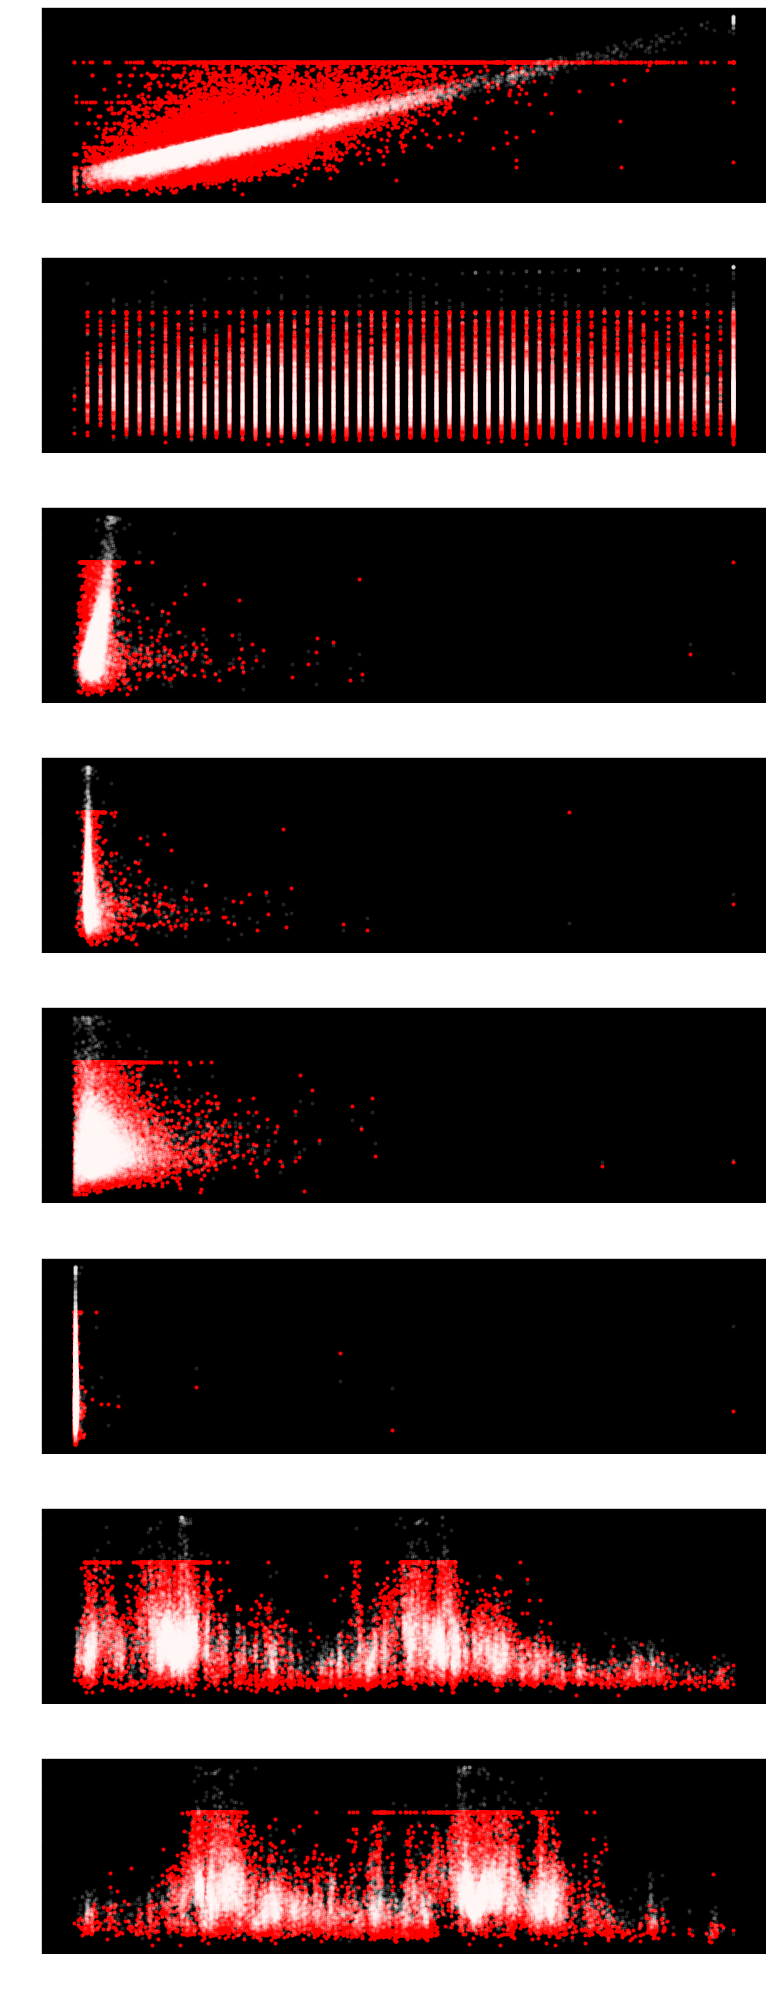

In [10]:
fig, axes = plt.subplots(figsize=(11,28), nrows=n, ncols=1)

for i, ax in enumerate(axes):
    ax.scatter(housing_data_plus_bias[:,i+1], housing_target[:], marker='.', color='r')
    ax.plot(housing_data_plus_bias[:,i+1], np.matmul(housing_data_plus_bias, theta_hat), '.w', alpha=0.1)
    ax.set_xlabel('Feature {}'.format(i+1))
    ax.set_ylabel('Normalized price')
plt.tight_layout()
plt.show()